In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('../data/synthetic_power_sector_projects.csv')

In [4]:
df.head()

,Project_ID,Project_Type,Capacity_MW_or_km,Region,Terrain,Planned_Duration_Months,Planned_Cost_Cr,Contractor_Experience_Level,Start_Year,Actual_Duration_Months,Actual_Cost_Cr
0,P1000,Wind Farm,141,North,Plain,53,1419,Low,2010,74,1938
1,P1001,Hydro Plant,416,North-East,Hilly,55,1584,High,2010,54,1415
2,P1002,Solar Plant,504,North-East,Plain,35,196,Medium,2021,46,301
3,P1003,Hydro Plant,477,North,Hilly,26,1221,Medium,2021,32,1442
4,P1004,Hydro Plant,558,North,Plain,43,913,Low,2023,46,940


In [5]:
df.shape

(50, 11)

In [6]:
df.isna().sum()

Project_ID                     0
Project_Type                   0
Capacity_MW_or_km              0
Region                         0
Terrain                        0
Planned_Duration_Months        0
Planned_Cost_Cr                0
Contractor_Experience_Level    0
Start_Year                     0
Actual_Duration_Months         0
Actual_Cost_Cr                 0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Project_ID                   50 non-null     object
 1   Project_Type                 50 non-null     object
 2   Capacity_MW_or_km            50 non-null     int64 
 3   Region                       50 non-null     object
 4   Terrain                      50 non-null     object
 5   Planned_Duration_Months      50 non-null     int64 
 6   Planned_Cost_Cr              50 non-null     int64 
 7   Contractor_Experience_Level  50 non-null     object
 8   Start_Year                   50 non-null     int64 
 9   Actual_Duration_Months       50 non-null     int64 
 10  Actual_Cost_Cr               50 non-null     int64 
dtypes: int64(6), object(5)
memory usage: 4.4+ KB


In [9]:
df.nunique()

Project_ID                     50
Project_Type                    5
Capacity_MW_or_km              50
Region                          5
Terrain                         2
Planned_Duration_Months        31
Planned_Cost_Cr                50
Contractor_Experience_Level     3
Start_Year                     15
Actual_Duration_Months         37
Actual_Cost_Cr                 49
dtype: int64

In [10]:
df.describe()

,Capacity_MW_or_km,Planned_Duration_Months,Planned_Cost_Cr,Start_Year,Actual_Duration_Months,Actual_Cost_Cr
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000
mean,546.420000,32.800000,991.98000,2016.860000,37.480000,1231.940000
std,277.833755,13.881422,589.12015,4.861385,17.143143,774.381739
min,51.000000,12.000000,51.00000,2010.000000,11.000000,68.000000
25%,319.250000,20.500000,465.25000,2012.000000,21.000000,470.500000
50%,518.500000,33.500000,1021.00000,2017.000000,38.500000,1298.000000
75%,793.250000,43.750000,1470.75000,2021.000000,47.500000,1744.250000
max,992.000000,59.000000,1993.00000,2024.000000,77.000000,2910.000000


In [11]:
df.head()

,Project_ID,Project_Type,Capacity_MW_or_km,Region,Terrain,Planned_Duration_Months,Planned_Cost_Cr,Contractor_Experience_Level,Start_Year,Actual_Duration_Months,Actual_Cost_Cr
0,P1000,Wind Farm,141,North,Plain,53,1419,Low,2010,74,1938
1,P1001,Hydro Plant,416,North-East,Hilly,55,1584,High,2010,54,1415
2,P1002,Solar Plant,504,North-East,Plain,35,196,Medium,2021,46,301
3,P1003,Hydro Plant,477,North,Hilly,26,1221,Medium,2021,32,1442
4,P1004,Hydro Plant,558,North,Plain,43,913,Low,2023,46,940


In [12]:
print("Categories in project Project_Type:        ",end=" ")
print(df['Project_Type'].unique())

print("Categories in Region:                      ",end=" ")
print(df['Region'].unique())

print("Categories in Terrain:                     ",end=" ")
print(df['Terrain'].unique())

print("Categories in Contractor_Experience_Level: ",end=" ")
print(df['Contractor_Experience_Level'].unique())

print("Categories in Capacity_MW_or_km:           ",end=" ")
print(df['Capacity_MW_or_km'].unique())

print("Categories in Start_Year:                      ",end=" ")
print(df['Start_Year'].unique())

Categories in project Project_Type:         ['Wind Farm' 'Hydro Plant' 'Solar Plant' 'Substation' 'Transmission Line']
Categories in Region:                       ['North' 'North-East' 'West' 'East' 'South']
Categories in Terrain:                      ['Plain' 'Hilly']
Categories in Contractor_Experience_Level:  ['Low' 'High' 'Medium']
Categories in Capacity_MW_or_km:            [141 416 504 477 558 825 992  84 255 130 981 611 921 437  51 439 615 155
 821 871 526 752 451 779 605 211 251 319 912 865 320 505 511 776 301 751
 345 774 769 798 387 928 102 841 971 266 813 237 429 542]
Categories in Start_Year:                       [2010 2021 2023 2022 2014 2015 2012 2018 2017 2024 2013 2016 2011 2019
 2020]


In [16]:
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O' and 'Start_Year']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

print('We have {} numeric features : {} '.format(len(numeric_features),numeric_features))
print('\nWe have {} categorical features : {} '.format(len(categorical_features),categorical_features))

We have 6 numeric features : ['Capacity_MW_or_km', 'Planned_Duration_Months', 'Planned_Cost_Cr', 'Start_Year', 'Actual_Duration_Months', 'Actual_Cost_Cr'] 

We have 5 categorical features : ['Project_ID', 'Project_Type', 'Region', 'Terrain', 'Contractor_Experience_Level'] 


In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Capacity_MW_or_km,50.0,546.42,277.833755,51.0,319.25,518.5,793.25,992.0
Planned_Duration_Months,50.0,32.80,13.881422,12.0,20.50,33.5,43.75,59.0
Planned_Cost_Cr,50.0,991.98,589.120150,51.0,465.25,1021.0,1470.75,1993.0
Start_Year,50.0,2016.86,4.861385,2010.0,2012.00,2017.0,2021.00,2024.0
Actual_Duration_Months,50.0,37.48,17.143143,11.0,21.00,38.5,47.50,77.0
Actual_Cost_Cr,50.0,1231.94,774.381739,68.0,470.50,1298.0,1744.25,2910.0


In [17]:
df['duration_overrun_months']=df['Actual_Duration_Months']-df['Planned_Duration_Months']
df['cost_overrun_cr']=df['Actual_Cost_Cr']-df['Planned_Cost_Cr']
df['duration_overrun_pct']=(df['duration_overrun_months']/df['Planned_Duration_Months'])*100
df['cost_overrun_pct']=(df['cost_overrun_cr']/df['Planned_Cost_Cr'])*100

In [18]:
df.head(2)

,Project_ID,Project_Type,Capacity_MW_or_km,Region,Terrain,Planned_Duration_Months,Planned_Cost_Cr,Contractor_Experience_Level,Start_Year,Actual_Duration_Months,Actual_Cost_Cr,duration_overrun_months,cost_overrun_cr,duration_overrun_pct,cost_overrun_pct
0,P1000,Wind Farm,141,North,Plain,53,1419,Low,2010,74,1938,21,519,39.622642,36.575053
1,P1001,Hydro Plant,416,North-East,Hilly,55,1584,High,2010,54,1415,-1,-169,-1.818182,-10.669192


#### Univariate Analysis

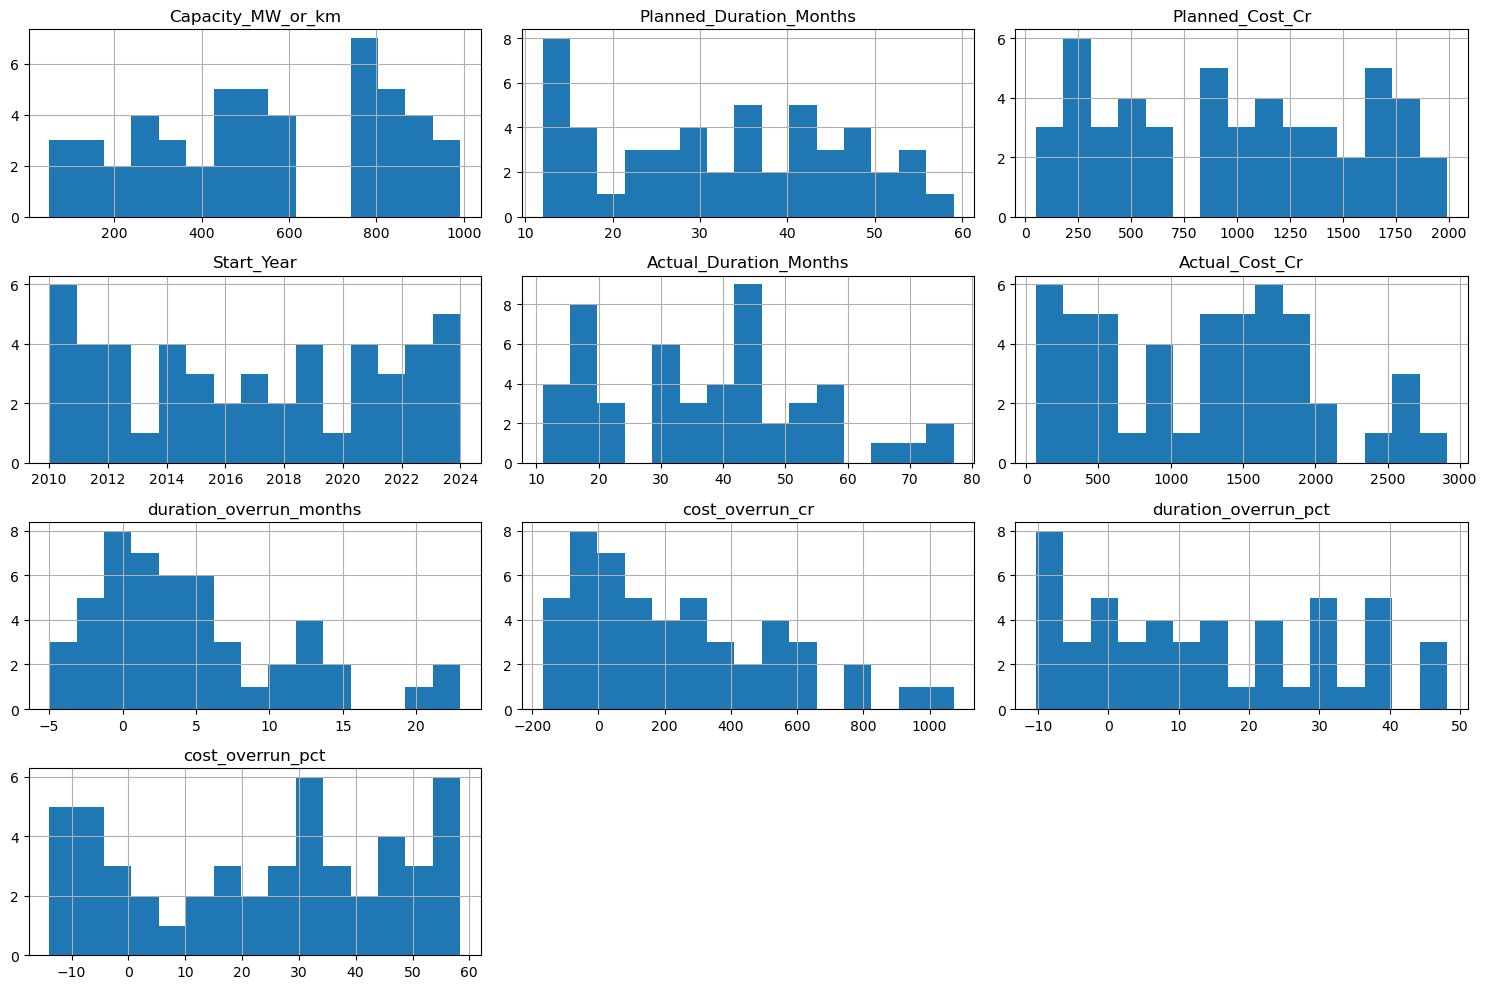

In [19]:
df.hist(bins=15,figsize=(15,10))
plt.tight_layout()
plt.show()

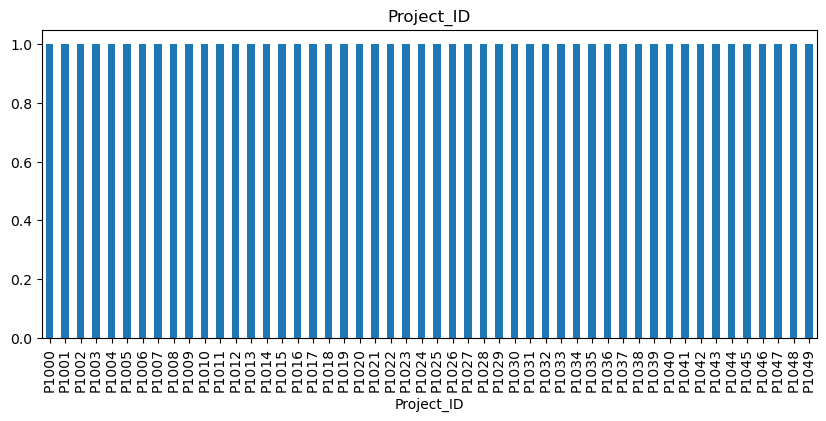

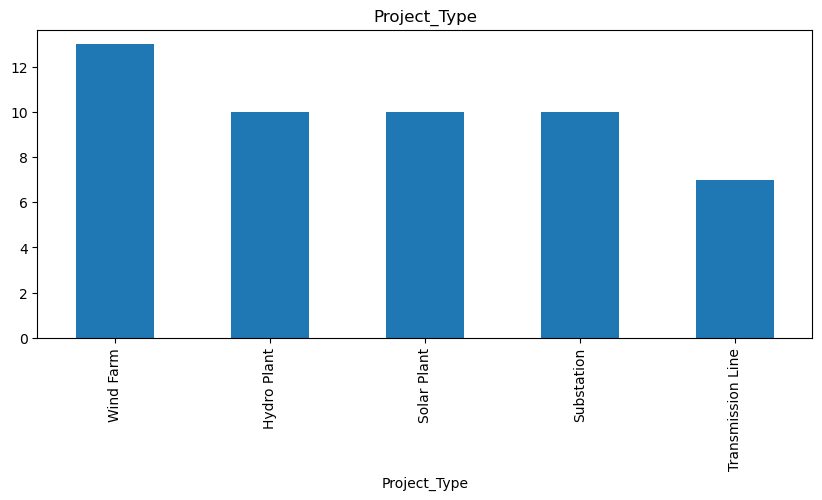

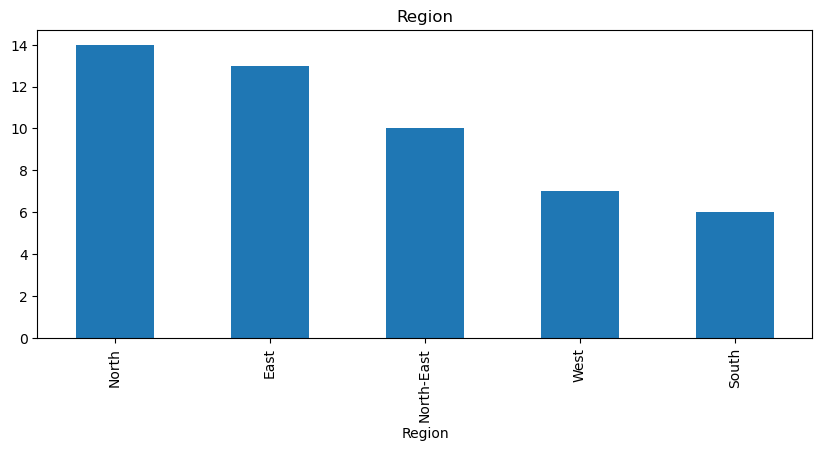

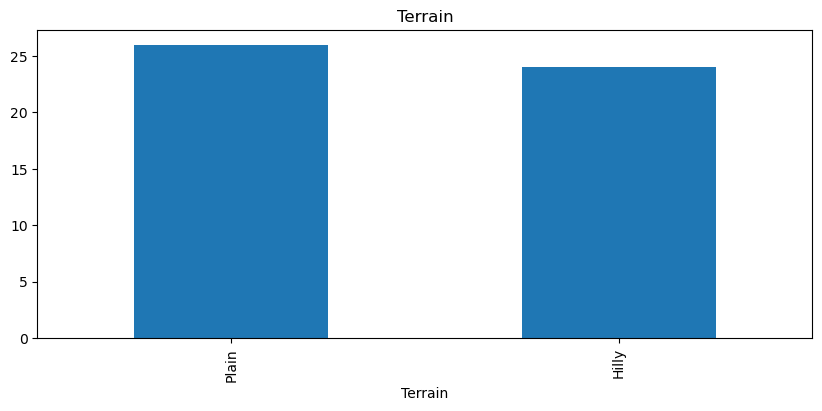

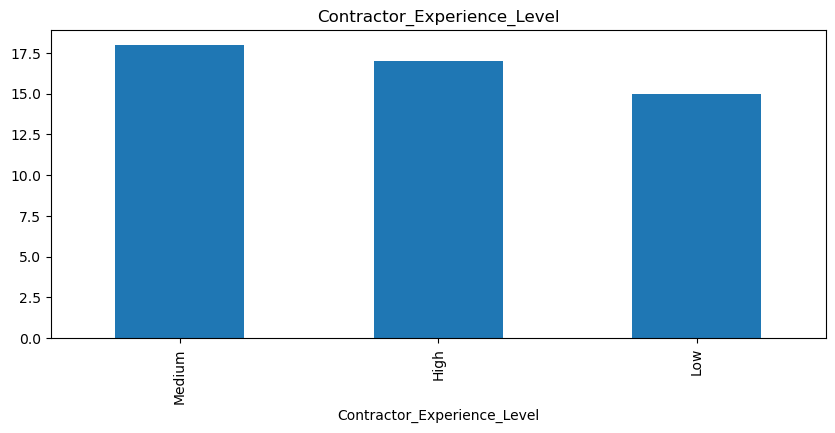

In [24]:
for col in categorical_features:
    df[col].value_counts().plot(kind='bar',title=col,figsize=(10,4))
    plt.show()

# Bivariate Analysis

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Project_ID                   50 non-null     object 
 1   Project_Type                 50 non-null     object 
 2   Capacity_MW_or_km            50 non-null     int64  
 3   Region                       50 non-null     object 
 4   Terrain                      50 non-null     object 
 5   Planned_Duration_Months      50 non-null     int64  
 6   Planned_Cost_Cr              50 non-null     int64  
 7   Contractor_Experience_Level  50 non-null     object 
 8   Start_Year                   50 non-null     int64  
 9   Actual_Duration_Months       50 non-null     int64  
 10  Actual_Cost_Cr               50 non-null     int64  
 11  duration_overrun_months      50 non-null     int64  
 12  cost_overrun_cr              50 non-null     int64  
 13  duration_overrun_pct  

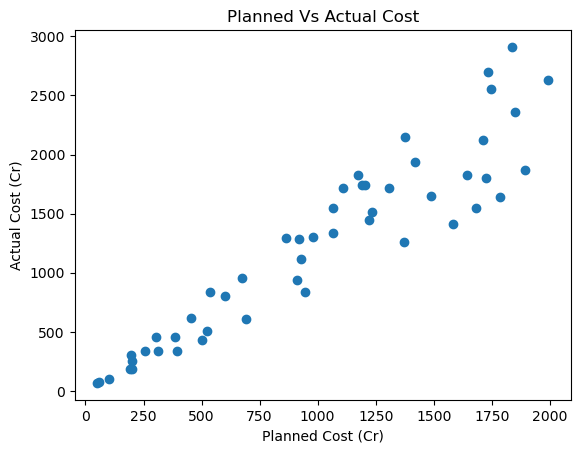

In [30]:
plt.scatter(df['Planned_Cost_Cr'],df['Actual_Cost_Cr'])
plt.plot(df['Planned_Cost_Cr'].min(),df['Planned_Cost_Cr'].max(),
         df['Planned_Cost_Cr'].min(),df['Planned_Cost_Cr'].max(),
         'r--')
plt.xlabel('Planned Cost (Cr)')
plt.ylabel("Actual Cost (Cr)")
plt.title("Planned Vs Actual Cost")
plt.show()

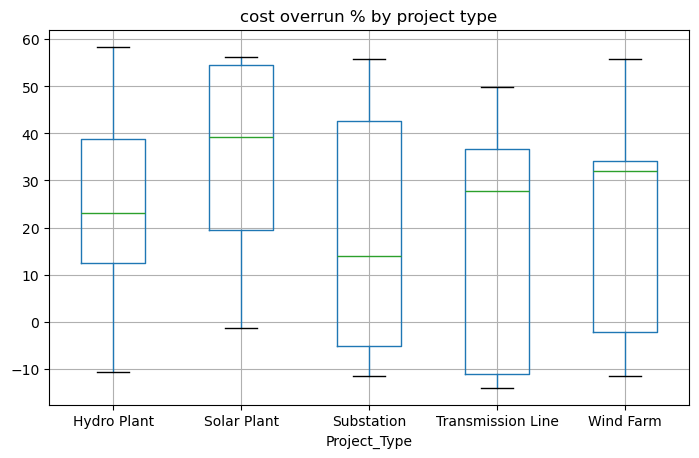

In [35]:
df.boxplot(column='cost_overrun_pct',by='Project_Type',figsize=(8,5))
plt.title("cost overrun % by project type")
plt.suptitle("")
plt.show()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

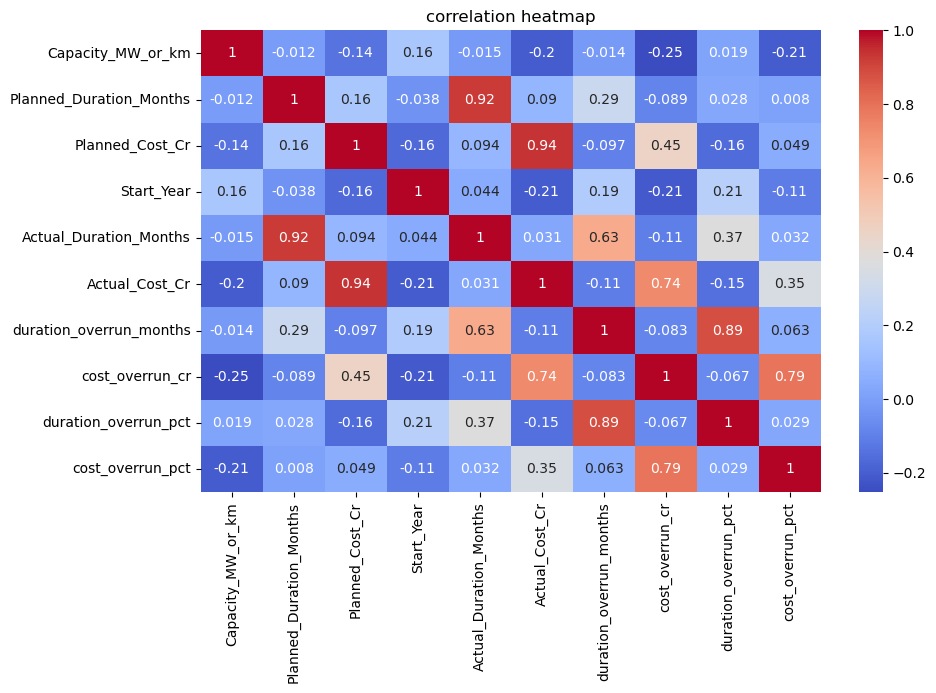

In [43]:
corr=df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.title("correlation heatmap")
plt.show()

In [44]:
print(df.groupby("Project_Type")["cost_overrun_pct"].mean())
print(df.groupby("Region")["duration_overrun_pct"].mean())

Project_Type
Hydro Plant          24.737777
Solar Plant          35.056936
Substation           18.262864
Transmission Line    16.446910
Wind Farm            21.571974
Name: cost_overrun_pct, dtype: float64
Region
East           7.329060
North         17.735085
North-East    20.707856
South          8.667397
West          14.365695
Name: duration_overrun_pct, dtype: float64


In [47]:
by_year = df.groupby("Start_Year").agg({
    'Project_ID':'count',
    'cost_overrun_pct':'mean',
    'duration_overrun_pct':'mean'
})
print(by_year)

            Project_ID  cost_overrun_pct  duration_overrun_pct
Start_Year                                                    
2010                 6         22.126041             14.524725
2011                 4         33.770955              3.760386
2012                 4         17.905958             10.290698
2013                 1         -2.072539             46.666667
2014                 4         37.718367             11.245529
2015                 3         22.940020             13.421796
2016                 2         21.813537             -9.651163
2017                 3         15.030175              5.977846
2018                 2         36.853794             18.181818
2019                 4         36.780290              8.672112
2020                 1         27.860697             32.500000
2021                 4         28.542837             21.668332
2022                 3         20.556424             15.420394
2023                 4          7.960881              7